# Lab 2: Root Finding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

%matplotlib inline

## Newton's method

### Exercise 2

#### Part 1
Write a function that take into argument a function, its derivative, an initial guess, a tolerance, a maximum number of iteration and return the zero of the function using Newton's method, the number of iteration it took, and the value of f at the root.

In [23]:
# def newton(f, x0, tol = 1e-6, itmax = 1000):
#     x = x0
#     it = 0
#     f_prime = sp.diff(f, sp.symbols('x'))
#     f_eval = sp.lambdify(sp.symbols('x'), f, "numpy")
#     f_prime_eval = sp.lambdify(sp.symbols('x'), f_prime, "numpy")
#     while True:
#         x_prev = x
#         x = x - f_eval(x)/f_prime_eval(x)
#         it = it + 1
#         if np.abs(x - x_prev) < tol or it >= itmax: # >= to prevent looping forever if we accidentally start a range with 0.
#             break
#     return x, it, np.abs((f.subs(sp.symbols('x'), x)))


def newton(f, x0, tol=1e-6, itmax=1000):
    x = x0
    it = 0
    f_prime = sp.diff(f, sp.symbols('x'))
    f_eval = sp.lambdify(sp.symbols('x'), f, "numpy")
    f_prime_eval = sp.lambdify(sp.symbols('x'), f_prime, "numpy")
    while True:
        x_prev = x
        fp = f_prime_eval(x)
        if fp == 0:
            return None
        x = x - f_eval(x) / fp
        it = it + 1
        if np.abs(x - x_prev) < tol or it >= itmax:
            break
    return x, it, np.abs(f.subs(sp.symbols('x'), x))



#### Part 2
Test your Newton Function with two functions you know the root of: a polynomial of degree of at least 2 and a non-polynomial function.

[(2.037037037037037, 1, 67.0745313214449), (1.4383552698704216, 2, 17.7818773009806), (1.1200223833365093, 3, 3.64511011189832), (1.0124022603818694, 4, 0.339031233001858), (1.0001513113605827, 5, 0.00408602493536137), (1.0000000228905097, 6, 6.18043776157151e-7), (1.0000000000000004, 7, 1.24344978758018e-14), (1.0, 8, 0), (1.0, 9, 0)] 

Key: (x, iteration number, f(x) -> 0)


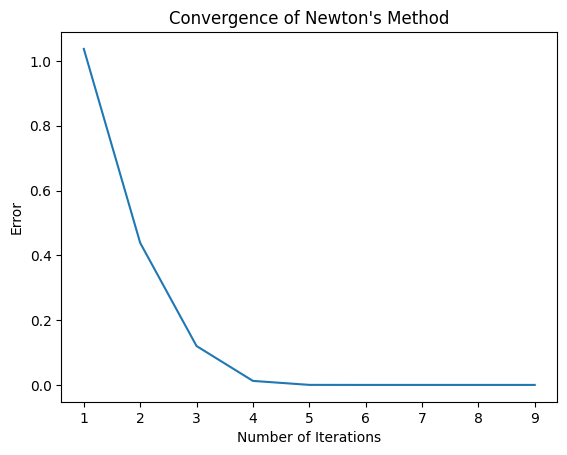

In [3]:
# TEST - tol = 0 (should force it to reach the max iteration??)
# def f(x):
#     return (9*x**2-9)

# def f_prime(x):
#     return 18*x

x = sp.symbols('x')

f = 9*x**3-9

errors = []

for i in range(1,10):
    errors.append(newton(f, 3, 0, i))

iters = [error[1] for error in errors]
error_val = [(error[0]-1) for error in errors]

plt.plot(iters, error_val)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Convergence of Newton's Method")
print(errors, "\n\nKey: (x, iteration number, f(x) -> 0)")


[(2.049787068367864, 1, 6.76624725053129), (1.178549386607422, 2, 2.24965678648743), (0.48627419131853844, 3, 0.626245837576105), (0.10118737165939329, 4, 0.106483946074409), (0.004951048979617262, 5, 0.00496332567509472), (1.2236240594616817e-05, 6, 1.22363154577698e-5), (7.486243088892402e-11, 7, 7.48623385504743e-11), (9.23440540803502e-17, 8, 0), (9.23440540803502e-17, 9, 0), (9.23440540803502e-17, 10, 0), (9.23440540803502e-17, 11, 0), (9.23440540803502e-17, 12, 0), (9.23440540803502e-17, 13, 0), (9.23440540803502e-17, 14, 0), (9.23440540803502e-17, 15, 0), (9.23440540803502e-17, 16, 0), (9.23440540803502e-17, 17, 0), (9.23440540803502e-17, 18, 0), (9.23440540803502e-17, 19, 0)] 

Key: (x, iteration number, f(x) -> 0)


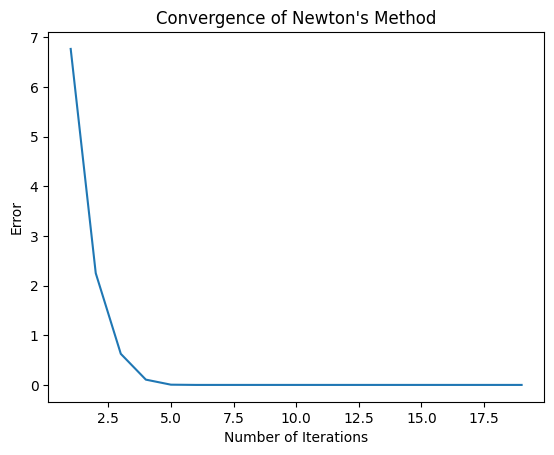

In [4]:
# TEST - tol = 0 (should force it to reach the max iteration??)
# def f(x):
#     return sp.exp(x) - 1


# def f_prime(x):
#     return sp.exp(x)

x = sp.symbols('x')

f = sp.exp(x) -1


errors = []

for i in range(1, 20):
    errors.append(newton(f, 3, 0, i))

iters = [error[1] for error in errors]
error_val = [error[2] for error in errors]

plt.plot(iters, error_val)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Convergence of Newton's Method")
print(errors, "\n\nKey: (x, iteration number, f(x) -> 0)")

### Exercise 3

Use your Newton's method function to find all the roots of $f(x)=32x^6-48x^4+18x^2-\sqrt{2}$ within $10^{-8}$ accuracy.

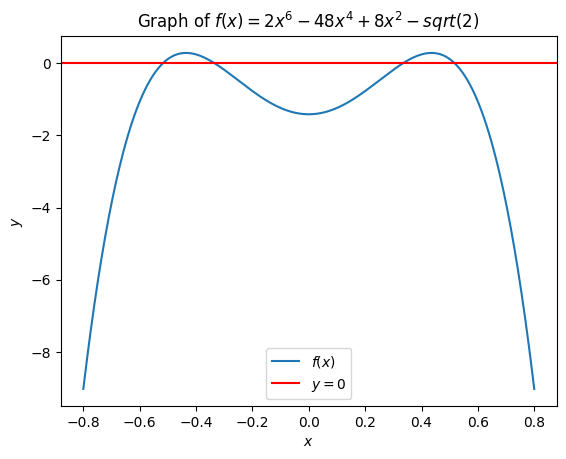

In [24]:
def f(x):
    return 2*x**6 - 48*x**4 + \
    18*x**2 - np.sqrt(2)

x = np.linspace(-.8, .8, 500)


plt.plot(x, f(x))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Graph of $f(x) = 2x^6 - 48x^4 + 8x^2 - sqrt(2)$")

plt.xlabel("$x$")

plt.ylabel("$y$")

plt.legend(["$f(x)$", "$y = 0$"])

# 2 solutions, not too sure about middle


In [36]:
x = sp.symbols('x')
f = 2*x**6 - 48*x**4 + \
    18*x**2 - np.sqrt(2)


initial_guesses = np.array([-4.8, -.5, -0.3, 0.3, 0.5, 4.8])
roots = np.zeros_like(initial_guesses, dtype='float64')
iters = np.zeros_like(initial_guesses, dtype='int64')
f_at_root = np.zeros_like(initial_guesses, dtype='float64')

for i, guess in enumerate(initial_guesses):
    roots[i], iters[i], f_at_root[i] = newton(f, guess, 1e-8, 1000)

print("Roots of the function:", roots)

Roots of the function: [-4.86006566 -0.51778399 -0.33415791  0.33415791  0.51778399  4.86006566]


In [22]:
iters


array([0., 0., 0., 0., 0., 0.])

### Exercise 4

Solve the equation
$$x^3-2x^2+3x-1=0$$
using Newton's method. (with a accuracy of $10^{-8}$)

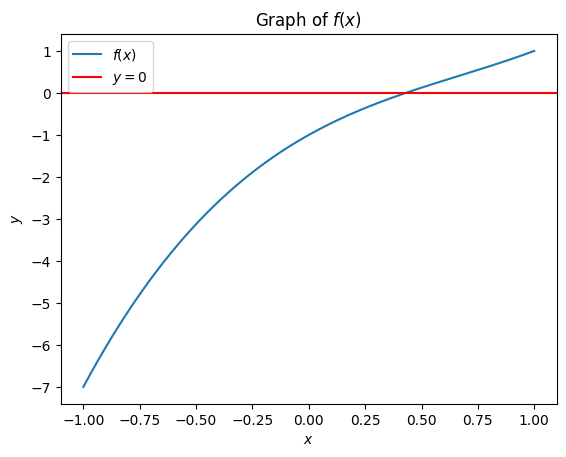

In [12]:
def f(x):
    return x**3 - 2*x**2 + 3*x - 1


x = np.linspace(-1, 1, 500)

plt.plot(x, f(x))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Graph of $f(x)$")

plt.xlabel("$x$")

plt.ylabel("$y$")

plt.legend(["$f(x)$", "$y = 0$"])

# only one solution

In [32]:
x = sp.symbols('x')
f = 2*x**6 - 48*x**4 + \
    18*x**2 - np.sqrt(2)

initial_guesses = [-4.8, -.5, -0.3, 0.3, 0.5, 4.8]
roots = []
tol = 1e-8

for guess in initial_guesses:
    root, iter, f_at_root = newton(
        f, guess, tol, 1000)
    # if abs(f_at_root) < tol:
    roots.append(root)


print("Roots of the function:", roots)


Roots of the function: [-4.860065660891836, -0.5177839939999556, -0.3341579078481465, 0.3341579078481465, 0.5177839939999556, 4.860065660891836]


### Exercise 5

Solve
$$x + e^{\sin(x)}=0$$
 with Toelrance $10^{-8}$.

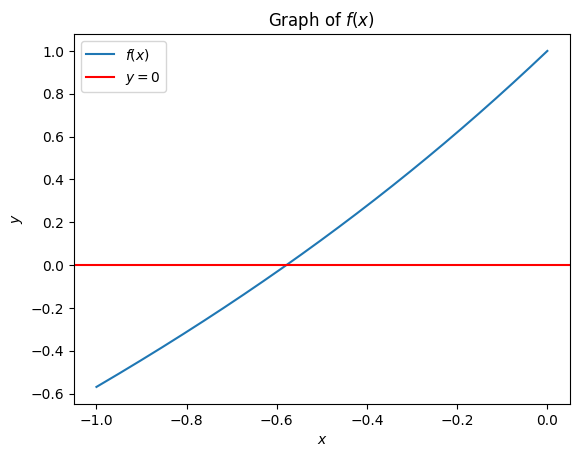

In [10]:
def f(x):
    return x + np.exp(np.sin(x))


x = np.linspace(-1, 0, 500)


plt.plot(x, f(x))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Graph of $f(x)$")

plt.xlabel("$x$")

plt.ylabel("$y$")

plt.legend(["$f(x)$", "$y = 0$"])


In [11]:
x = sp.symbols('x')
f = x + sp.exp(sp.sin(x))

guess = -0.6
roots = []
tol = 1e-8
root, iter, f_at_root = newton(
    f, guess, tol, 1000)
# if abs(f_at_root) < tol:
roots.append(root)


print("Roots of the function:", roots)


Roots of the function: [-0.5787136435197242]


### Exercise 6

Use the newton method to define $\log(x)$ assuming you know the function $e^x$. Use Newton's method with the $e^x$ function to find $\log(3)$

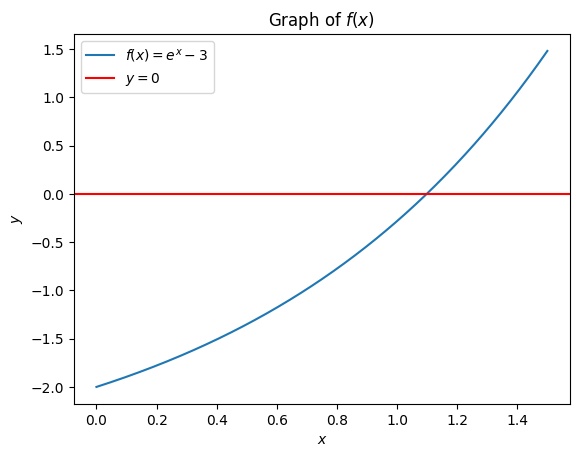

In [6]:
# log 3 = x => e^x = 3 => e^x - 3 = 0 (solve using Newton's method)

def f(x):
    return np.exp(x) - 3


x = np.linspace(0, 1.5, 500)


plt.plot(x, f(x))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Graph of $f(x)$")

plt.xlabel("$x$")

plt.ylabel("$y$")

plt.legend(["$f(x)=e^x-3$", "$y = 0$"])

In [10]:
x = sp.symbols('x')
f = sp.exp(x) - 3


guess = 1.1
root = None
tol = 1e-8
root, iter, f_at_root = newton(
    f, guess, tol, 1000)
# if abs(f_at_root) < tol:


print(
    f"Root of the function: {root:.6f} found after {iter} iterations. This is $\log(3)$")


Root of the function: 1.098612 found after 3 iterations. This is $\log(3)$


### Exercise 7

Let us compute $\sqrt[m]{a}$, with $a>0$ and $m$ a positive integer. Find a way to apply the Newton's method to this problem to find $\sqrt[m]{5}$ for $m=3,4,5,6,7,8,$ say to six significant digits.

In [18]:
# a^(1/m) = x => a = x^m => x^m - a = 0. Solve with Newton's Method.
# Compute nth roots for m = 3, 4, 5, 6, 7, 8
x = sp.symbols('x')
m_values = [3, 4, 5, 6, 7, 8]
a = 5
tol = 1e-6
x0 = 1.5
itmax = 1000
x = sp.symbols('x')
for m in m_values:
    f = x**m - a
    root, iter, value = newton(f, x0, tol, itmax)
    print(f"{m}th root of {a}: {root:.6f} (converged in {iter} iterations, with a value of {value})")


3th root of 5: 1.709976 (converged in 4 iterations, with a value of 1.50990331349021E-13)
4th root of 5: 1.495349 (converged in 3 iterations, with a value of 8.88178419700125E-16)
5th root of 5: 1.379730 (converged in 4 iterations, with a value of 2.21422880031241E-12)
6th root of 5: 1.307660 (converged in 5 iterations, with a value of 0)
7th root of 5: 1.258499 (converged in 5 iterations, with a value of 4.83142414964277E-11)
8th root of 5: 1.222845 (converged in 6 iterations, with a value of 8.88178419700125E-16)


## Exercise 8

Find a way using the newton's method to approximate $\arcsin(x)$ when you know $\sin(x)$. Then Approximate $\arcsin(1/2)$, $\arcsin(1/4)$.

In [46]:
# arcsin(something) = x => sin(x) = something => sin(x) - something = 0


x = sp.symbols('x')

tol = 1e-6
itmax = 1000


x0 = 1/2
s = 1/2

f = sp.sin(x) - s
approximation = newton(f, x0, tol, itmax)

print("The approximation of asin(1/2) is:", approximation,
      "\n\nKey: (x, iteration number, f(x) -> 0)")

x0 = 1/4
s = 1/4

f = sp.sin(x) - s
approximation = newton(f, x0, tol, itmax)

print("The approximation of asin(1/4) is:", approximation,
      "\n\nKey: (x, iteration number, f(x) -> 0)")

# def asin_approx(y, x0, tol, itmax):
#     x = sp.symbols('x')
#     f = sp.sin(x) - y
#     return newton(f, x0, tol, itmax)


# tol = 1e-8  # Tolerance
# itmax = 1000  # Maximum number of iterations

# y = 1/2
# x0 = 1/2  # Initial guess, sin(x) ~ x
# approx, it, f_val = asin_approx(y, x0, tol, itmax)
# print(
#     f"Approximation for asin({y}): {approx:.8f}, after {it} iterations, with f({approx:.8f}) = {f_val:.8f}")

# y = 1/4
# x0 = 1/4  # Initial guess, sin(x) ~ x
# approx, it, f_val = asin_approx(y, x0, tol, itmax)
# print(
#     f"Approximation for asin({y}): {approx:.8f}, after {it} iterations, with f({approx:.8f}) = {f_val:.8f}")


The approximation of asin(1/2) is: (0.5235987755982988, 3, 5.55111512312578e-17) 

Key: (x, iteration number, f(x) -> 0)
The approximation of asin(1/4) is: (0.2526802551419693, 2, 1.05887520973624e-13) 

Key: (x, iteration number, f(x) -> 0)


## Secant Method

### Exercise 9

#### Part 1
Write a function that take into argument a function, its derivative, an initial guess, a tolerance, a maximum number of iteration and return the zero of the function using Secant's method


#### Part 2
Test your Secant method function with a polynomial you know the root of.

### Exercise 10

Solve the equation
$$x + e^{\sin(x)}=0$$
using the secant's method. (with tolerence = $10^{-8}$)


### Exercise 11


Using the Newton's method Find the minimum value of
$$(1-x)^2+e^{x^2}-2\log( (3-x)^2)$$

## Fixed Point Method

### BONUS: Exercise 10 

We can convert the equation $x^2-6=0$ into a fixed-point problem:
$$x=x+c(x^2-6)$$
Find a $c$  such that the fixed point methods converges to the solution.